In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
# Define model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax'),
])

In [4]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[checkpoint])


Epoch 1/20
313/313 [==============================] - 8s 7ms/step - loss: 1.9958 - accuracy: 0.2646 - val_loss: 1.8444 - val_accuracy: 0.3384
Epoch 2/20
 24/313 [=>............................] - ETA: 1s - loss: 1.8839 - accuracy: 0.3200

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step - loss: 1.8510 - accuracy: 0.3301 - val_loss: 1.7303 - val_accuracy: 0.3766
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7956 - accuracy: 0.3475 - val_loss: 1.7247 - val_accuracy: 0.3872
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7576 - accuracy: 0.3616 - val_loss: 1.7097 - val_accuracy: 0.3932
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7404 - accuracy: 0.3726 - val_loss: 1.6803 - val_accuracy: 0.4016
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7160 - accuracy: 0.3794 - val_loss: 1.6685 - val_accuracy: 0.4046
Epoch 7/20
313/313 [==============================] - 1s 5ms/step - loss: 1.6948 - accuracy: 0.3869 - val_loss: 1.6744 - val_accuracy: 0.4085
Epoch 8/20
313/313 [==============================] - 2s 5ms/step - loss: 1.6891 - accuracy: 0.3913 - val_loss: 1.6266 - val_accuracy: 0.4231
Epoch 9/20
313/31

In [5]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 1.5141 - accuracy: 0.4621
Test loss: 1.5141
Test accuracy: 0.4621


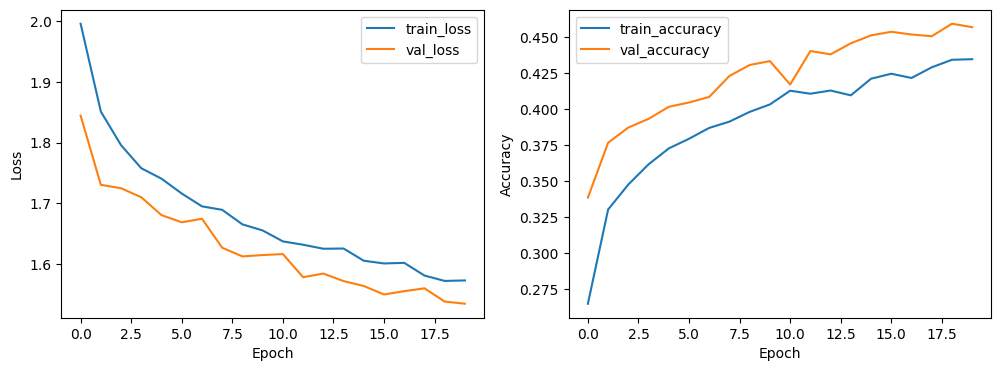

In [6]:
# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

def get_confusion_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

313/313 [==============================] - 1s 2ms/step
Precision: 0.4655
Recall: 0.4621
F1 score: 0.4521


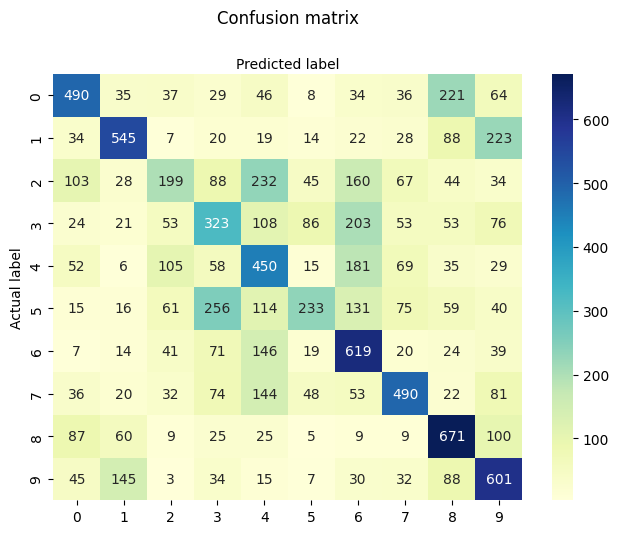

In [8]:
# Report metrics on test data
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')
#print(f'Confusion matrix:\n{cm}')
get_confusion_matrix(cm)